In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import gif
import numpy as np
import pandas as pd
from qutip import *
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import os

/Users/matt/anaconda3/envs/anaconda/lib/python3.11/site-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [2]:
H_latex = "$H = (\Delta E / 2) \sigma_z + \hbar\omega(a^{{\dagger}}a +1/2) + U( a^{{\dagger}} + a )\sigma_x$"

In [3]:
def make_operators(max_bosons, parity=0):
    
    a  = tensor(destroy(max_bosons+1), qeye(2))     # tensorised boson destruction operator
    sx = tensor(qeye(max_bosons+1), sigmax())       # tensorised sigma_x operator
    sz = tensor(qeye(max_bosons+1),sigmaz())        # tensorised sigma_z operator
    
    two_state     =  1/2*sz                         # two state system energy operator   𝜎𝑧/2
    bosons       =  (a.dag()*a+0.5)                 # boson energy operator              𝑎†𝑎+1/2
    number        = a.dag()*a                       # boson number operator              𝑎†𝑎
    interaction  = (a.dag() + a) * sx               # interaction energy operator        (𝑎†+𝑎)𝜎𝑥  
    
    P = sz*(1j*np.pi*a.dag()*a).expm()              # parity operator 
    
    # map from QuTiP number states to |n,±> states
    possible_ns = range(0, max_bosons+1)
    possible_ms = ["+","-"]
    nm_list = [(n,m) for (n,m) in product(possible_ns, possible_ms)]
    
    # only do parity extraction if a valid parity is being used
    if (parity==1) | (parity==-1):
        p           = np.where(P.diag()==parity)[0]
        
        two_state   = two_state.extract_states(p)
        bosons      = bosons.extract_states(p)
        number      = number.extract_states(p)
        interaction = interaction.extract_states(p)
        nm_list     = [nm_list[i] for i in p]
    
    
    return two_state, bosons, interaction, number, nm_list

In [4]:
def make_braket_labels(nm_list):
    bra_labels = ["$\langle$"+str(n)+", "+str(m)+" |" for (n,m) in nm_list]
    ket_labels = ["| "+str(n)+", "+str(m)+"$\\rangle$" for (n,m) in nm_list]
    return bra_labels, ket_labels

In [159]:
max_bosons = 500
two_state, bosons, interaction, number, nm_list = make_operators(max_bosons=max_bosons, parity=1)

In [160]:
DeltaE = 10000
omega =1
U = 100

In [161]:
H =  DeltaE*two_state + omega*bosons + U*interaction

In [162]:
psi0 = basis(len(nm_list), 0)


In [163]:
times = np.linspace(0.0, 0.01, 1000)

In [164]:
bra_labels, ket_labels = make_braket_labels(nm_list)

In [165]:
# projection_operators = [basis(len(nm_list), i) * basis(len(nm_list), i).dag() for i in range(len(nm_list))]
# result = sesolve(H, psi0, times, e_ops=projection_operators)

In [166]:
# plt.figure(figsize=(10,8))
# for i in range(0,len(result.expect)):
#     plt.plot(times, result.expect[i][:], label=f"{ket_labels[i]}")
# plt.ylabel("Probability")
# plt.xlabel("Time")
# plt.legend(loc="right")
# plt.title(f" {H_latex}    ($\Delta E={DeltaE}$, $\omega={omega}$, $U={U}$)     (Fig 12)")
# plt.show();

In [167]:
result = sesolve(H, psi0, times, e_ops=[H, DeltaE*two_state, omega*bosons, U*interaction ])

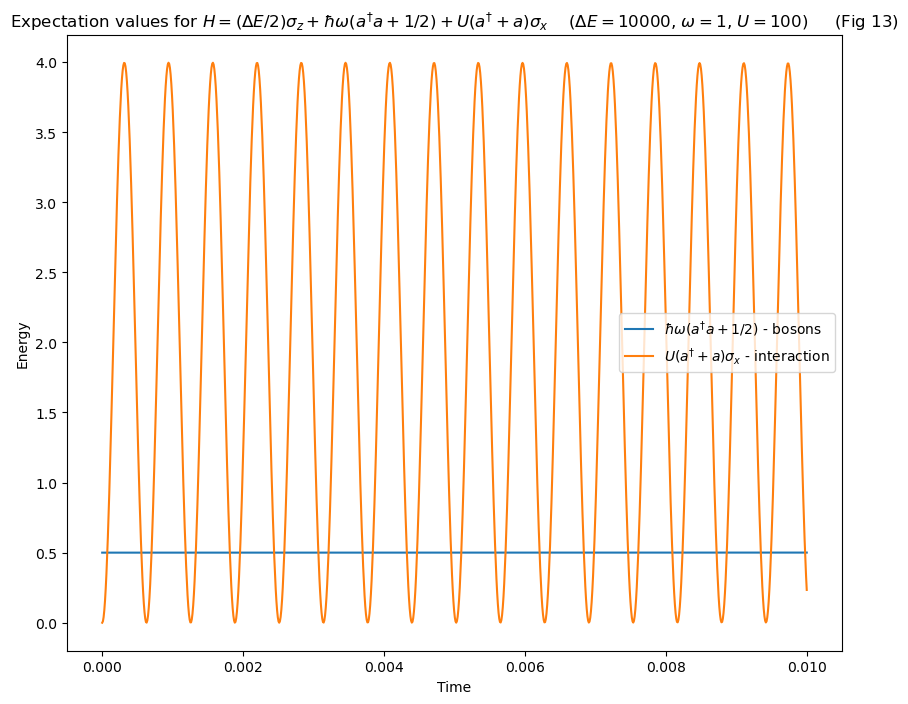

In [168]:
plt.figure(figsize=(10,8))
# plt.plot(times, result.expect[0], label="$H$ - Total Hamiltonian")
# plt.plot(times, result.expect[1], label="$(\Delta E/2) \sigma_z$ - TSS")
plt.plot(times, result.expect[2], label="$\hbar\omega(a^{{\dagger}}a +1/2)$ - bosons")
plt.plot(times, result.expect[3], label="$U( a^{{\dagger}} + a )\sigma_x$ - interaction")

plt.ylabel("Energy")
plt.xlabel("Time")
plt.legend(loc="right")
plt.title(f"Expectation values for {H_latex}    ($\Delta E={DeltaE}$, $\omega={omega}$, $U={U}$)     (Fig 13)")
plt.show();